# Comparing freezing on SEFLA
* old: This needs to be corrected. many cells with all mice analysis has been remo
* including all ELS mice 6/11/2023 GT, also consolidating with the codbase

In [1]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd /content/sleep/
!pip install .

Cloning into 'sleep'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 263 (delta 9), reused 14 (delta 5), pack-reused 242
Receiving objects: 100% (263/263), 1.08 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (135/135), done.
/content/sleep
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.1-py3-none-any.whl size=997 sha256=e2bb6743052b35ceacfe751c273eb3b2df19490bee7402450f1f8c24d08750c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-k6xv6n96/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


In [2]:
%cd /content/sleep/
!git pull

/content/sleep
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 10 (delta 7), reused 10 (delta 7), pack-reused 0
Unpacking objects: 100% (10/10), 925 bytes | 231.00 KiB/s, done.
From https://github.com/GergelyTuri/sleep
   ca0c50e..3e3d405  master     -> origin/master
Updating ca0c50e..3e3d405
Fast-forward
 base/core.py | 2 +-
 base/eeg.py  | 2 +-
 2 files changed, 2 insertions(+), 2 deletions(-)


In [19]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=d97654e0813a13b76ac8f2fe8db4c85094efd021c3e372f7ad84c39ddbf74ccc
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [20]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("talk", font_scale=0.6)
# for slope calculation
from scipy.stats import linregress
from scipy.stats import ttest_ind
import pingouin as pg


from sleep.base import core

%matplotlib inline

In [4]:
dr = core.GoogleDrive()
dr.mount_drive()
save_dir = Path('/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/' \
                '!analysis/saveFolder/ELS/figures')

Mounted at /gdrive


To creat the `stim_interval_freezing` i loaded the sefla trials in freezview5 and set up an export with custom intervals. the intervals can be found in `sefla_shock_sequence` sheet. i used .5s bouts.

In [5]:
# this includes other non-els cohorts as well
data = dr.load_spreadsheet_data('stim_interval_freezing_w_ELS_5_16_22')

# els mice
cohort_list = ['els1', 'els2']
els_data = data[data['cohort'].isin(cohort_list)]
raw_data = els_data.copy()

In [6]:
raw_data

,cohort,condition,els,sex,genotype,id,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10
88,els1,control,y,male,wt,922-1,11.8,28.41,12.37,55.32,8.09,9.15,1.31,3.06,48.64,98.73,95.07
89,els1,control,y,male,wt,922-2,0,0,0.18,0,1.4,1.08,1.89,5.81,0.63,7.7,53.19
90,els1,control,y,male,wt,922-3,1.74,7.13,4.8,9.6,2.98,12.81,16.06,51.48,14.86,31.41,34.18
91,els1,control,y,male,wt,922-4,0.27,0.74,0,0.15,0,0,0.26,0,0.19,0.3,1.08
92,els1,control,y,male,wt,922-5,0,0,0.98,1.27,0,2.8,0.26,3.47,1.14,2.09,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,els2,sefl,n,male,wt,WC31-3,2.56,5.97,16.1,29.69,36.84,51.02,69.78,72.99,85.71,66.27,88.67
158,els2,sefl,y,male,wt,25-5,3.29,28.68,60.41,79.46,90.33,93.43,96.8,64.63,91.33,99.4,86.51
159,els2,sefl,y,male,wt,WC29-1,9.61,28.8,36.48,53.82,53.67,83.64,73.5,79.1,89.75,79.58,67.11
160,els2,sefl,y,male,wt,WC29-2,10.43,52.74,55.34,78.26,78.7,78.47,91.25,87.16,88.99,81.6,70.36


In [7]:
raw_data[["pre", "shock01", "shock02", "shock03",
       "shock04", "shock05", "shock06",
       "shock07", "shock08", "shock09",
       "shock10"]] = raw_data[["pre", "shock01", "shock02", "shock03",
       "shock04", "shock05", "shock06",
       "shock07", "shock08", "shock09",
       "shock10"]].apply(pd.to_numeric)

raw_data[['condition', 'els',
          'sex', 'genotype']] = raw_data[['condition', 'els',
                                          'sex', 'genotype']].astype('category')

raw_data['cohort_id'] = raw_data['cohort']+'_'+raw_data['id']
raw_data['cohort_id'] = raw_data['cohort_id'].astype('string')

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 88 to 161
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   cohort     74 non-null     object  
 1   condition  74 non-null     category
 2   els        74 non-null     category
 3   sex        74 non-null     category
 4   genotype   74 non-null     category
 5   id         74 non-null     object  
 6   pre        74 non-null     float64 
 7   shock01    74 non-null     float64 
 8   shock02    74 non-null     float64 
 9   shock03    74 non-null     float64 
 10  shock04    74 non-null     float64 
 11  shock05    74 non-null     float64 
 12  shock06    74 non-null     float64 
 13  shock07    74 non-null     float64 
 14  shock08    74 non-null     float64 
 15  shock09    74 non-null     float64 
 16  shock10    74 non-null     float64 
 17  cohort_id  74 non-null     string  
dtypes: category(4), float64(11), object(2), string(1)
memory usage: 9.4+ K

In [9]:
raw_data.groupby(['condition', 'els'])['cohort_id'].nunique()

condition  els
control    n      14
           y      24
sefl       n      14
           y      22
Name: cohort_id, dtype: int64

In [10]:
df = raw_data.copy()
melted_df = pd.melt(df, id_vars=['cohort_id', 'sex', 'genotype', 'els',
                                 'condition'],
                    value_vars=df.columns[6:-1], value_name='freezing(%)',
                  var_name='time point')
melted_df

# filtering out SEFL mice
sefl_mice = melted_df[melted_df['condition']== 'sefl']
sefl_mice.reset_index(inplace=True, drop=True)
sefl_mice

,cohort_id,sex,genotype,els,condition,time point,freezing(%)
0,els1_939-1,male,wt,n,sefl,pre,1.10
1,els1_939-2,male,wt,n,sefl,pre,9.71
2,els1_941-1,male,wt,n,sefl,pre,3.11
3,els1_941-2,male,wt,n,sefl,pre,2.11
4,els1_941-3,male,wt,y,sefl,pre,0.37
...,...,...,...,...,...,...,...
391,els2_WC31-3,male,wt,n,sefl,shock10,88.67
392,els2_25-5,male,wt,y,sefl,shock10,86.51
393,els2_WC29-1,male,wt,y,sefl,shock10,67.11
394,els2_WC29-2,male,wt,y,sefl,shock10,70.36


In [11]:
sefl_mice.groupby(['els', 'sex'])['cohort_id'].nunique()

els  sex   
n    female     6
     male       8
y    female    14
     male       8
Name: cohort_id, dtype: int64

In [12]:
all_mice = sefl_mice['cohort_id'].nunique()
no_els = sefl_mice.groupby('els')['cohort_id'].nunique()[0]
yes_els = sefl_mice.groupby('els')['cohort_id'].nunique()[1]

no_els_males = sefl_mice.groupby(['sex', 'els'])['cohort_id'].nunique()[2]
yes_els_males = sefl_mice.groupby(['sex', 'els'])['cohort_id'].nunique()[3]
no_els_females = sefl_mice.groupby(['sex', 'els'])['cohort_id'].nunique()[0]
yes_els_females = sefl_mice.groupby(['sex', 'els'])['cohort_id'].nunique()[1]
sefl_mice.groupby(['sex', 'els'])['cohort_id'].nunique()

sex     els
female  n       6
        y      14
male    n       8
        y       8
Name: cohort_id, dtype: int64

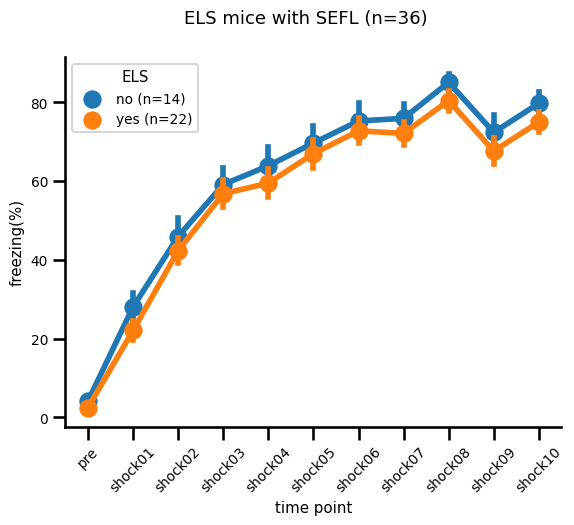

In [13]:
fig = plt.figure()
fig.suptitle(f'ELS mice with SEFL (n={all_mice})')
g = sns.pointplot(data=sefl_mice, x='time point', y='freezing(%)',
                 hue='els',  errorbar='se')
g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)
leg_handles = g.get_legend_handles_labels()[0]
g.legend(leg_handles, [f'no (n={no_els})',
                       f'yes (n={yes_els})'],
          title='ELS')
sns.despine()
# fig.savefig(save_dir.joinpath('All mice SEFL group els vs no els.png'),
#             dpi=300, bbox_inches='tight')

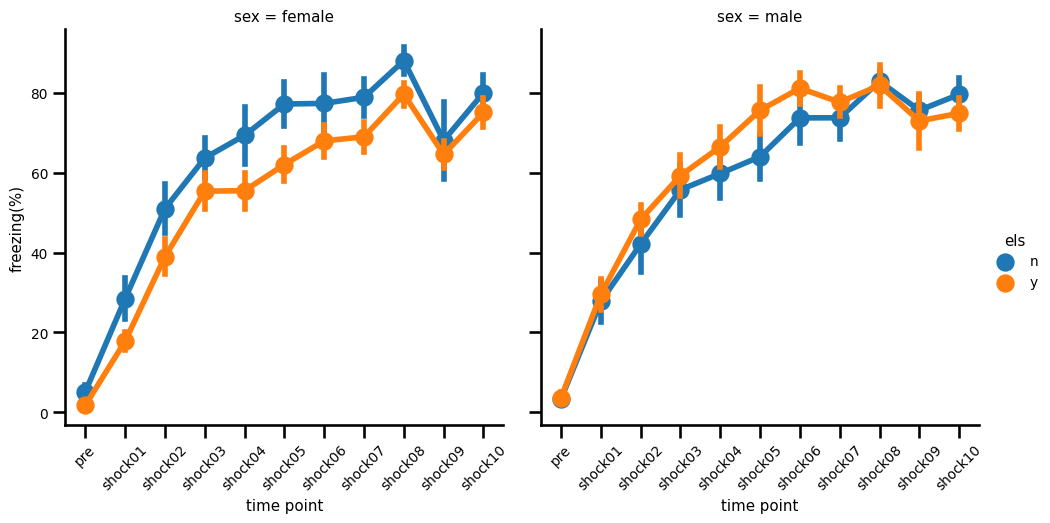

In [14]:
g = sns.catplot(data=sefl_mice, x='time point', y='freezing(%)',
                col='sex', hue='els', kind='point', legend=True,
                errorbar='se')
g.set_xticklabels(rotation=45)
# g.savefig(save_dir.joinpath('All mice by sex SEFL group els vs no els.png'),
#             dpi=300, bbox_inches='tight')

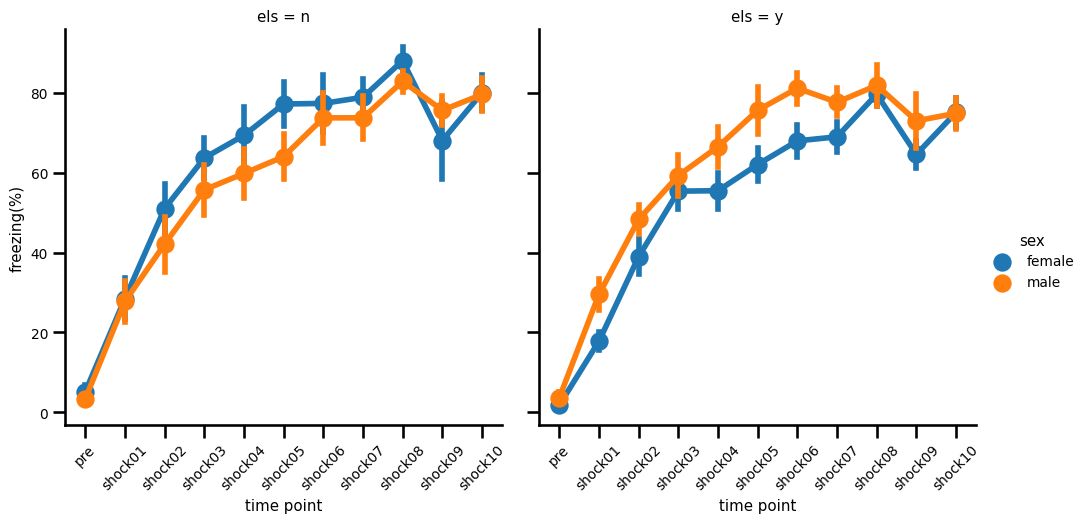

In [16]:
g = sns.catplot(data=sefl_mice, x='time point', y='freezing(%)',
                col='els', hue='sex', kind='point', legend=True,
                errorbar='se')
g.set_xticklabels(rotation=45)
g.savefig(save_dir.joinpath('All SEFL mice by ELS male vs females.png'),
            dpi=300, bbox_inches='tight')

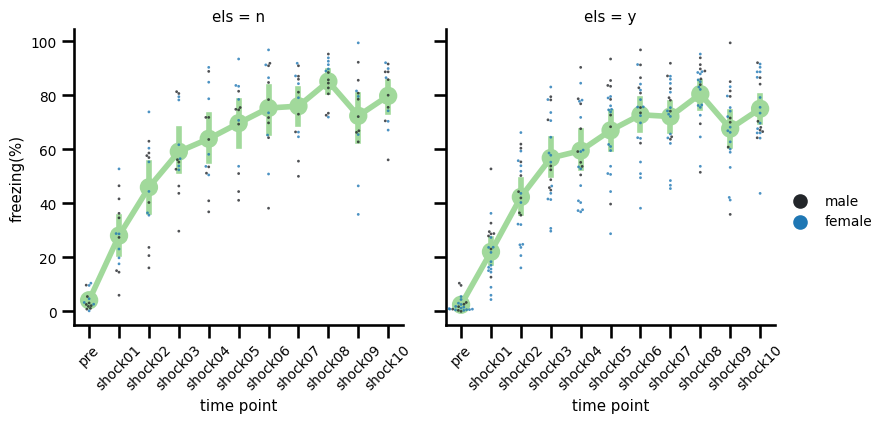

In [17]:
g = sns.FacetGrid(sefl_mice, col='els', height=4)
order = sefl_mice['time point'].unique()
g.map(sns.pointplot, 'time point', 'freezing(%)', order=order,
      color='#a1d99b')
g.map(sns.swarmplot, 'time point', 'freezing(%)','sex',
      alpha=.8, size=2, order=order, hue_order=['male', 'female'],
      palette='dark:#1f77b4')
g.set_xticklabels(rotation=45)
g.add_legend()
# g.savefig(save_dir.joinpath('All mice els vs no els individuals.png'),
#             dpi=300, bbox_inches='tight')

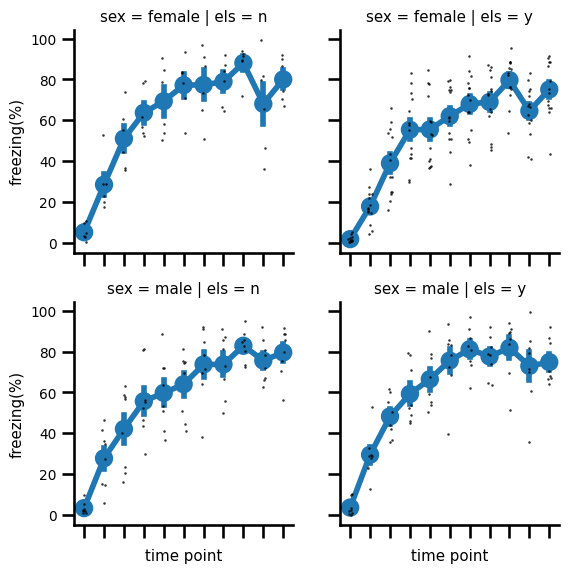

In [18]:
g = sns.FacetGrid(sefl_mice, col='els', row='sex')
g.map(sns.pointplot, 'time point', 'freezing(%)', order=order,
      errorbar='se')
g.map(sns.stripplot, 'time point', 'freezing(%)',
      alpha=.8, size=1.8, order=order, color='k')
g.set_xticklabels(rotation=45)
# g.savefig(save_dir.joinpath('All mice individuals.png'),
#             dpi=300, bbox_inches='tight')

### Mixed ANOVA: all sefl mice

In [21]:
res = pg.mixed_anova(data=sefl_mice, dv='freezing(%)', between='els',
                     within='time point',
                     subject='cohort_id', correction=True)
res.round(3)

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,els,1317.976,1,34,1317.976,1.559,0.22,NaN,0.044,NaN,NaN,NaN,NaN
1,time point,216992.339,10,340,21699.234,167.024,0.00,0.0,0.831,0.521,False,0.012,0.0
2,Interaction,148.242,10,340,14.824,0.114,1.00,NaN,0.003,NaN,NaN,NaN,NaN


### Mixed anova: females

In [22]:
data = sefl_mice[sefl_mice['sex']=='female']
res = pg.mixed_anova(data=data, dv='freezing(%)', between='els',
                     within='time point',
                     subject='cohort_id', correction=True)
res.round(3)

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,els,3780.692,1,18,3780.692,5.043,0.038,NaN,0.219,NaN,NaN,NaN,NaN
1,time point,120847.259,10,180,12084.726,90.213,0.000,0.0,0.834,0.524,False,0.002,0.001
2,Interaction,648.372,10,180,64.837,0.484,0.899,NaN,0.026,NaN,NaN,NaN,NaN


### Mixed anova: males

In [23]:
data = sefl_mice[sefl_mice['sex']=='male']
res = pg.mixed_anova(data=data, dv='freezing(%)', between='els',
                     within='time point',
                     subject='cohort_id', correction=True)
res.round(3)

/usr/local/lib/python3.10/dist-packages/pingouin/parametric.py:1568: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  aov = pd.concat([aov_betw.drop(1), aov_with.drop(1)], axis=0, sort=False, ignore_index=True)


,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,els,395.790,1,14,395.790,0.492,0.495,NaN,0.034,NaN,NaN,NaN,NaN
1,time point,97002.574,10,140,9700.257,76.464,0.000,0.0,0.845,0.411,True,0.002,0.108
2,Interaction,941.293,10,140,94.129,0.742,0.684,NaN,0.050,NaN,NaN,NaN,NaN


In [ ]:
sefl_mice.to_csv(save_dir.joinpath('sefl_mice.csv'), index=False)

Skipping this part for now

In [ ]:
raw_dob = dr.load_spreadsheet_data('id_dob')

# dob_df['cohort_id']= dob_df['cohort']+'_'+dob_df['id']
# dob_df.drop(['id', 'cohort'], axis=1, inplace=True )
# dob_df['dob'] = dob_df['dob'].astype('datetime64[ns]')

# dob_df.head()
# print(f'dob_df shape{dob_df.shape}')

merging freezing with DOB-s. Although this is not necessary bc we will not use this info later on.

In [ ]:
merged_df = df.merge(dob_df,left_on='cohort_id', right_on='cohort_id')
merged_df

,group,els,sex,genotype,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10,cohort_id,dob
0,Control,n,Male,wt,0.46,3.08,7.83,2.70,2.70,0.75,5.87,2.04,3.67,4.71,3.85,ptsd2_81,2021-02-16
1,Control,n,Male,wt,2.20,7.32,5.78,6.37,8.28,13.89,12.86,8.15,7.91,12.19,13.84,ptsd2_82,2021-02-16
2,Control,n,Male,wt,0.55,2.09,2.40,4.05,1.67,2.48,2.42,2.96,1.39,4.34,1.93,ptsd2_91,2021-02-16
3,Control,n,Male,wt,0.00,1.35,6.41,1.57,1.02,1.51,1.57,0.61,2.47,0.45,2.89,ptsd2_92,2021-02-16
4,Control,n,Male,wt,0.00,2.71,0.71,3.00,7.16,6.14,1.11,3.98,4.62,12.64,8.66,ptsd3_12,2021-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Control,y,Female,wt,0.00,0.62,31.94,1.57,4.74,7.21,4.70,4.89,12.52,7.85,3.13,els1_868-2,2021-10-18
125,Control,y,Female,wt,0.00,2.58,15.93,14.54,6.98,18.84,8.09,22.73,27.70,5.98,45.37,els1_868-3,2021-10-18
126,Control,n,Female,wt,0.00,2.58,6.76,5.10,1.67,3.55,1.76,5.71,4.68,9.05,1.20,els1_921-2,2021-10-25
127,Control,n,Female,wt,1.65,4.37,6.76,3.37,16.93,4.84,1.31,21.30,35.48,7.11,43.32,els1_921-3,2021-10-25


Filtering out the mice for the ELS project

In [ ]:
age_matched_controls = ['ptsd3_2', 'ptsd3_12',
       'ptsd3_1', 'ptsd3_3', 'ptsd3_11', 'ptsd5_11', 'ptsd5_61',
       'ptsd5_12', 'ptsd5_13', 'ptsd5_64', 'ptsd5_62'] #'ptsd1_sert26a-3', 'ptsd1_sert26a-2',

els_mice = df[df['cohort_id'].str.startswith('els1')]
print(f'els mice: {els_mice.shape}')

age_matched_mice = df[df['cohort_id'].isin(age_matched_controls)]
print(f'age matched mice: {age_matched_mice.shape}')

els_age_matched = pd.concat([els_mice, age_matched_mice], axis=0)
print(f'els and age matched: {els_age_matched.shape}')
els_age_matched.head()

###################################
# saving this as a csv for further#
# analysis.                       #
###################################
# els_age_matched.to_csv(os.path.join(save_dir, 'els_and_age_matched_mice.csv'))

els mice: (42, 16)
age matched mice: (11, 16)
els and age matched: (53, 16)


Filtering out non-ELS mice for other analysis

In [ ]:
non_els = merged_df[merged_df['els']== 'n']

# saving:
# non_els.to_csv(join(save_dir, 'noELS', 'DATA', 'IS_interval_freezing_no_ELS.csv'))

In [ ]:
print(f'all mice: {els_age_matched.cohort_id.nunique()}')
print(f'\n ================ \n')
print('els mice \n {}'.format(els_age_matched.groupby('els')['cohort_id'].nunique()))
print(f'\n ================ \n')
print('els mice \n {}'.format(els_age_matched.groupby(['els', 'group'])['cohort_id'].nunique()))
print(f'\n ================ \n')
print(els_age_matched.groupby('group')['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'sex'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'genotype'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'els'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(els_age_matched.groupby(['group', 'els', 'sex'])['cohort_id'].nunique())

all mice: 53


els mice 
 els
n    23
y    30
Name: cohort_id, dtype: int64


els mice 
 els  group  
n    Control    10
     SEFL       13
y    Control    16
     SEFL       14
Name: cohort_id, dtype: int64


group
Control    26
SEFL       27
Name: cohort_id, dtype: int64


group    sex   
Control  Female    16
         Male      10
SEFL     Female    16
         Male      11
Name: cohort_id, dtype: int64


group    genotype
Control  wt          26
SEFL     wt          27
Name: cohort_id, dtype: int64


group    els
Control  n      10
         y      16
SEFL     n      13
         y      14
Name: cohort_id, dtype: int64


group    els  sex   
Control  n    Female     5
              Male       5
         y    Female    11
              Male       5
SEFL     n    Female     6
              Male       7
         y    Female    10
              Male       4
Name: cohort_id, dtype: int64



Melting the df to the long form

In [ ]:
def melter(df):
  melted

In [ ]:
non_els.head(1)

,group,els,sex,genotype,pre,shock01,shock02,shock03,shock04,shock05,shock06,shock07,shock08,shock09,shock10,cohort_id,dob
0,Control,n,Male,wt,0.46,3.08,7.83,2.7,2.7,0.75,5.87,2.04,3.67,4.71,3.85,ptsd2_81,2021-02-16


In [ ]:
df = non_els
melted_df = pd.melt(df, id_vars=['cohort_id', 'group', 'sex', 'genotype', 'els',
                                 'dob'],
                    value_vars=df.columns[4:-1])

# renaming one column
melted_df.rename(columns={0: "condition", 'value': 'freezing(%)'},
                 inplace=True)
melted_df

#############################
#saving the data on disk as #
# as a CSV. uncomment if you#
# need                      #
#############################


# melted_df.to_csv(join(join(save_dir, 'noELS', 'DATA',
#                            'IS_interval_freezing_no_ELS_long.csv')))

adding time column to df

In [ ]:
# constructing dictionary with numerical values that replace the strings
conditions = melted_df['condition'].unique()
times = np.arange(0, 3600, 350)
cond_dict = dict(zip(conditions, times))
# adding an empty column
melted_df['time'] = pd.Series.empty

In [ ]:
melted_df.head()

,cohort_id,group,sex,genotype,els,dob,condition,freezing(%),time
0,ptsd2_81,Control,Male,wt,n,2021-02-16,pre,0.46,<property object at 0x7f8e6d2d1590>
1,ptsd2_82,Control,Male,wt,n,2021-02-16,pre,2.20,<property object at 0x7f8e6d2d1590>
2,ptsd2_91,Control,Male,wt,n,2021-02-16,pre,0.55,<property object at 0x7f8e6d2d1590>
3,ptsd2_92,Control,Male,wt,n,2021-02-16,pre,0.00,<property object at 0x7f8e6d2d1590>
4,ptsd3_12,Control,Male,wt,n,2021-01-03,pre,0.00,<property object at 0x7f8e6d2d1590>


In [ ]:
def filler(row):
  """fills in the field according to the content
  of a dictionary"""
  for key in cond_dict.keys():
    if row == key:
      val = cond_dict[key]
  return val

In [ ]:
melted_df['time'] = melted_df['condition'].apply(filler)

In [ ]:
print(f'all mice: {len(melted_df.cohort_id.unique())}')
print(f'\n ================ \n')
print(melted_df.groupby('group')['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'sex'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'genotype'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'els'])['cohort_id'].nunique())
print(f'\n ================ \n')
print(melted_df.groupby(['group', 'els', 'sex'])['cohort_id'].nunique())

all mice: 99


group
Control    41
SEFL       58
Name: cohort_id, dtype: int64


group    sex   
Control  Female    18
         Male      23
SEFL     Female    22
         Male      36
Name: cohort_id, dtype: int64


group    genotype
Control  sert         6
         wt          35
SEFL     sert         8
         wt          50
Name: cohort_id, dtype: int64


group    els
Control  n      41
SEFL     n      58
Name: cohort_id, dtype: int64


group    els  sex   
Control  n    Female    18
              Male      23
SEFL     n    Female    22
              Male      36
Name: cohort_id, dtype: int64


Text(0.5, 1.0, 'Inter-shock interval freezing N=85')

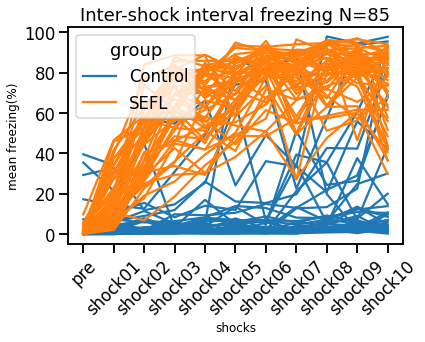

In [ ]:
# selected mice broken down to SEFL and CONTROL
plt.figure()
df = melted_df[melted_df['genotype']=='wt']

g = sns.lineplot(data=df, x='condition', y='freezing(%)', hue='group',
                 units='cohort_id', estimator=None)
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)
plt.title("Inter-shock interval freezing N={}".format(len(df.cohort_id.unique())))
# plt.savefig(os.path.join(savedir, 'IS_freezing_allmice_grouped.png'),
#             transparent=True, dpi=300, figsize = (8,6))

([<matplotlib.lines.Line2D at 0x7f8e67098910>,
 ['group', 'Control', 'SEFL', 'genotype', 'wt'])

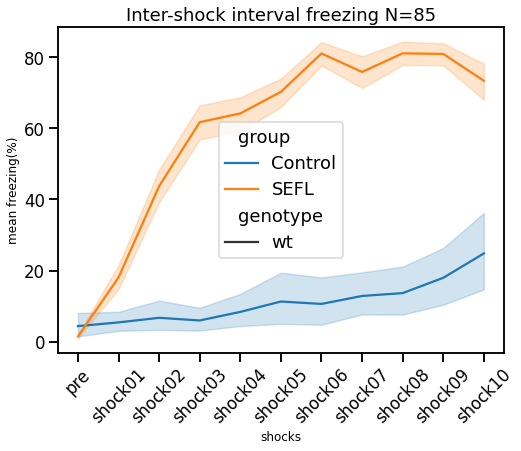

In [ ]:
plt.figure(figsize = (8,6))
g = sns.lineplot(data=df, x='condition', y='freezing(%)',
             hue='group', style='genotype')
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)
num_mice = df.cohort_id.nunique()
plt.title("Inter-shock interval freezing N={}".format(num_mice))
g.get_legend_handles_labels({})
# plt.savefig(os.path.join(savedir, 'IS_freezing_per_genotype_grouped_03_02.png'),
#             transparent=True, dpi=300)

([<matplotlib.lines.Line2D at 0x7f8e640e1c10>,
 ['group', 'Control', 'SEFL', 'sex', 'Male', 'Female'])

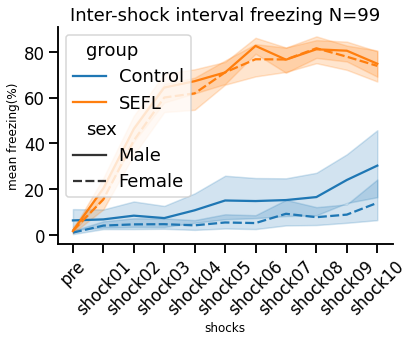

In [ ]:
# all mice broken down to SEFL-CONTROL and ELS
g = sns.lineplot(data=df, x='condition', y='freezing(%)',
             hue='group', style='sex')
sns.despine()
plt.setp(g.get_xticklabels(), rotation=45)
plt.xlabel('shocks', size=12)
plt.ylabel('mean freezing(%)', size=12)
plt.title("Inter-shock interval freezing N={}".format(df.cohort_id.nunique()))
g.get_legend_handles_labels({})
# plt.savefig(join(save_dir, 'IS_freezing_groupedby_sex_5_1.png'),
#             transparent=True, dpi=300, figsize = (8,6), bbox_inches='tight')

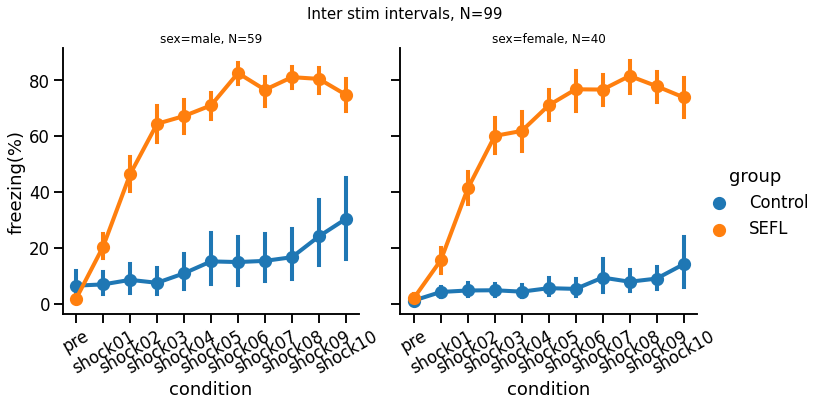

In [ ]:
# all mice broken down to SEFL-CONTROL and sex ELS included!!!
mice = len(df.cohort_id.unique())
females = df.groupby(['sex'])['cohort_id'].nunique().get('Female')
males = df.groupby(['sex'])['cohort_id'].nunique().get('Male')
# plt.figure(figsize = (15,8))
num_sexes = df.groupby(['sex'])['cohort_id'].nunique()
num_mice = df.cohort_id.nunique()

g = sns.catplot(data= melted_df, x='condition', y='freezing(%)',
                  hue='group', col='sex', kind='point')
ax1= g.facet_axis(0,0)
ax1.set_title(label=f'sex=male, N={males}', fontdict={'fontsize': 12})
ax2= g.facet_axis(0,1)
ax2.set_title(label=f'sex=female, N={females}', fontdict={'fontsize': 12})

g.fig.suptitle(f'Inter stim intervals, N={mice}', y=1.03,fontsize=15)
g.set_xticklabels(rotation = 30)
# plt.savefig(os.path.join(savedir, 'IS_freezing_allmice_grouped_by_sex_03_02.png'),
#             transparent=True, dpi=300)

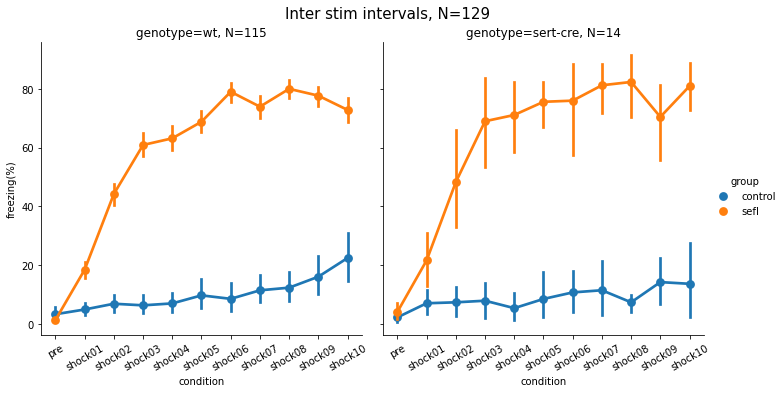

In [ ]:
mice = len(melted_df.cohort_id.unique())
wt = wt = melted_df.groupby(['genotype'])['cohort_id'].nunique().get('wt')
sert = melted_df.groupby(['genotype'])['cohort_id'].nunique().get('sert')

# plt.figure(figsize = (15,8))
g = sns.catplot(data= melted_df, x='condition', y='freezing(%)',
                  hue='group', col='genotype', kind='point')
ax1= g.facet_axis(0,0)
ax1.set_title(label=f'genotype=wt, N={wt}', fontdict={'fontsize': 12})
ax2= g.facet_axis(0,1)
ax2.set_title(label=f'genotype=sert-cre, N={sert}', fontdict={'fontsize': 12})

g.fig.suptitle(f'Inter stim intervals, N={mice}', y=1.03,fontsize=15)
g.set_xticklabels(rotation = 30)

# plt.savefig(os.path.join(savedir, 'IS_freezing_grouped_by_genotype_03_02.png'),
#             transparent=True, dpi=300)

calculatig learning rate based on slope of lines connecting different mean `is` freezing

In [ ]:
melted_df.head()

,cohort_id,group,sex,genotype,els,dob,condition,freezing(%),time
0,ptsd2_81,Control,Male,wt,n,2021-02-16,pre,0.46,0
1,ptsd2_82,Control,Male,wt,n,2021-02-16,pre,2.20,0
2,ptsd2_91,Control,Male,wt,n,2021-02-16,pre,0.55,0
3,ptsd2_92,Control,Male,wt,n,2021-02-16,pre,0.00,0
4,ptsd3_12,Control,Male,wt,n,2021-01-03,pre,0.00,0


In [ ]:
unmelted_df = melted_df.set_index(
    ['cohort_id', 'group', 'sex', 'condition', 'genotype','els']) \
              ['freezing(%)'].unstack().reset_index(drop=True)

In [ ]:
unmelted_df.head()

els,n
0,0.00
1,2.58
2,6.76
3,5.10
4,1.67


In [ ]:
unmelted2_df = melted_df.set_index(
    ['cohort_id', 'group', 'sex', 'condition', 'els', 'genotype']) \
              ['freezing(%)'].unstack()

In [ ]:
unmelted2_df

genotype                                 sert    wt
cohort_id  group   sex    condition els            
els1_921-2 Control Female pre       n     NaN  0.00
                          shock01   n     NaN  2.58
                          shock02   n     NaN  6.76
                          shock03   n     NaN  5.10
                          shock04   n     NaN  1.67
...                                       ...   ...
ptsd9_31-5 Control Male   shock06   n     NaN  8.68
                          shock07   n     NaN  5.61
                          shock08   n     NaN  9.23
                          shock09   n     NaN  5.83
                          shock10   n     NaN  4.45

[1089 rows x 2 columns]

In [ ]:
# using shock06 as a second time point
unmelted2_df['x'] = unmelted2_df.apply(lambda row: [0.0,100.0], axis=1)
unmelted2_df['y'] = unmelted2_df.apply(lambda row: [row.pre, row.shock06], axis=1)

AttributeError: ignored

In [ ]:
# calculating slopes
unmelted2_df['slope_pre_shock06'] = unmelted2_df.apply(lambda row: linregress(row.x, row.y)[0], axis=1)

In [ ]:
unmelted2_df.index.levels

FrozenList([['els1_300-1', 'els1_300-2', 'els1_300-3', 'els1_828-1', 'els1_828-2', 'els1_828-3', 'els1_868-1', 'els1_868-2', 'els1_868-3', 'els1_902-1', 'els1_902-2', 'els1_902-3', 'els1_921-2', 'els1_921-3', 'els1_921-4', 'els1_922-1', 'els1_922-2', 'els1_922-3', 'els1_922-4', 'els1_922-5', 'els1_927-1', 'els1_927-2', 'els1_927-3', 'els1_930-1', 'els1_930-2', 'els1_930-3', 'els1_930-4', 'els1_936-1', 'els1_936-2', 'els1_939-1', 'els1_939-2', 'els1_941-1', 'els1_941-2', 'els1_941-3', 'els1_942-1', 'els1_942-2', 'els1_942-3', 'els1_942-4', 'els1_973-1', 'els1_973-2', 'els1_973-3', 'els1_973-4', 'ptsd10_25-1', 'ptsd10_25-2', 'ptsd10_25-3', 'ptsd10_31-5', 'ptsd10_39-2', 'ptsd10_43-1', 'ptsd10_43-2', 'ptsd10_43-5', 'ptsd2_81', 'ptsd2_82', 'ptsd2_83', 'ptsd2_84', 'ptsd2_85', 'ptsd2_91', 'ptsd2_92', 'ptsd2_93', 'ptsd2_94', 'ptsd2_95', 'ptsd3_1', 'ptsd3_11', 'ptsd3_12', 'ptsd3_2', 'ptsd3_3', 'ptsd3_5', 'ptsd3_6', 'ptsd3_7', 'ptsd3_8', 'ptsd3_9', 'ptsd4_61', 'ptsd4_62', 'ptsd4_63', 'ptsd4_64',

In [ ]:
unm = unmelted2_df.reset_index(level=0).reset_index()
# unm2 = unm.reset_index()
unm.head(2)
unm.columns

Index(['group', 'sex', 'cohort_id', 'pre', 'shock01', 'shock02', 'shock03',
       'shock04', 'shock05', 'shock06', 'shock07', 'shock08', 'shock09',
       'shock10', 'x', 'y', 'slope_pre_shock06'],
      dtype='object', name='condition')

In [ ]:
# save_df = unm.loc[:,['cohort_id','slope_pre_shock06']]
# save_df.to_csv(os.path.join(savedir, 'sefla_learning_slope.csv'))

In [ ]:
remelt = pd.melt(unm, id_vars=['cohort_id', 'group', 'sex'],
                 value_name='slope_pre_shock06',
                 value_vars="slope_pre_shock06")
remelt.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cohort_id,group,sex,condition,slope_pre_shock06
0,els1_300-1,sefl,male,slope_pre_shock06,0.8277
1,els1_300-2,sefl,male,slope_pre_shock06,0.7464


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


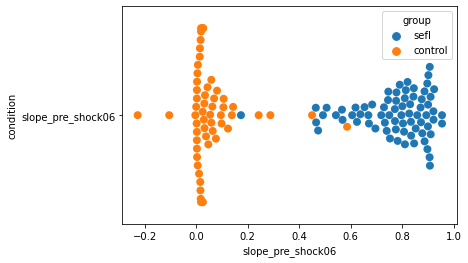

In [ ]:
# plt.figure(figsize = (15,8))
g = sns.swarmplot(x='slope_pre_shock06', y='condition',
                  data=remelt,size=8, hue='group')
# plt.savefig(os.path.join(savedir, 'pre_shock06_slope_allmice_swarm.png'))

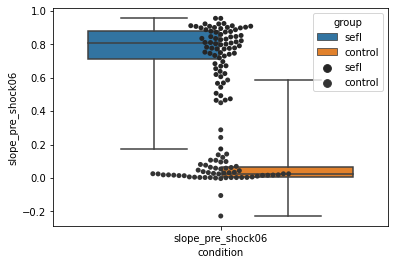

In [ ]:
# plt.figure(figsize = (15,8))
g = sns.boxplot(x='condition', y='slope_pre_shock06',
                  data=remelt, hue='group',whis=np.inf)
g = sns.swarmplot(x='condition', y='slope_pre_shock06',
                  data=remelt,color='.2', hue='group')
# plt.savefig(os.path.join(savedir, 'pre_shock06_slope_allmice_swarm_box.png'))

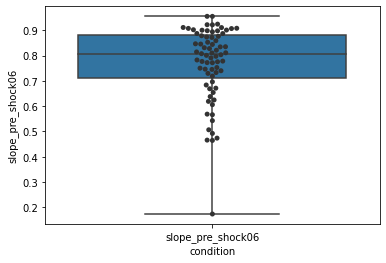

In [ ]:
sefl_mice = remelt[remelt['group']== 'sefl']
# plt.figure(figsize = (15,8))
g = sns.boxplot(x='condition', y='slope_pre_shock06',
                  data=sefl_mice, whis=np.inf)
g = sns.swarmplot(x='condition', y='slope_pre_shock06',
                  data=sefl_mice,color='.2')
# plt.savefig(os.path.join(savedir, 'pre_shock06_slope_SEFLmice_swarm_box.png'))

### TODO: calculate freezing in SEFLB (although it is pretty short)